# Introduction

About the task
--------------

This data set contains information on customers of an insurance company. 
The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. 
The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why? 

Information about customers consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. 
The data was supplied by the Dutch data mining company Sentient Machine Research 
and is based on a real world business problem. The training set contains over 5000 descriptions of customers, 
including the information of whether or not they have a caravan insurance policy. 
A test set contains 4000 customers of whom only the organisers know if they have a caravan insurance policy.

Each observation corresponds to a postal code. 
Variables beginning with M refer to demographic statistics of the postal code, 
while variables beginning with P and A (as well as CARAVAN, the target variable) refer to product ownership and insurance statistics in the postal code.

The details about the features are available in the https://github.com/szbela87/dm/blob/main/hw2/description.txt file.


Competition rules
-----------------

Objective: predict the CARAVAN column of the evaluation data

Models:

    * first competition: only random forests
    * second competition: any model

Metric: balanced accuracy

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/szbela87/dm/main/hw2/ticdata2000.txt",sep="\t",header=None)

In [3]:
df_test = pd.read_csv("https://raw.githubusercontent.com/szbela87/dm/main/hw2/ticeval2000.txt",sep="\t",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [6]:
feature_names = ['MOSTYPE' , 'MAANTHUI' , 'MGEMOMV' , 'MGEMLEEF' , 'MOSHOOFD' , 'MGODRK' , 'MGODPR' , 'MGODOV' , 'MGODGE' , 'MRELGE' , 'MRELSA' , 'MRELOV' , 'MFALLEEN' , 'MFGEKIND' , 'MFWEKIND' , 'MOPLHOOG' , 'MOPLMIDD' , 'MOPLLAAG' , 'MBERHOOG' , 'MBERZELF' , 'MBERBOER' , 'MBERMIDD' , 'MBERARBG' , 'MBERARBO' , 'MSKA' , 'MSKB1' , 'MSKB2' , 'MSKC' , 'MSKD' , 'MHHUUR' , 'MHKOOP' , 'MAUT1' , 'MAUT2' , 'MAUT0' , 'MZFONDS' , 'MZPART' , 'MINKM30' , 'MINK3045' , 'MINK4575' , 'MINK7512' , 'MINK123M' , 'MINKGEM' , 'MKOOPKLA' , 'PWAPART' , 'PWABEDR' , 'PWALAND' , 'PPERSAUT' , 'PBESAUT' , 'PMOTSCO' , 'PVRAAUT' , 'PAANHANG' , 'PTRACTOR' , 'PWERKT' , 'PBROM' , 'PLEVEN' , 'PPERSONG' , 'PGEZONG' , 'PWAOREG' , 'PBRAND' , 'PZEILPL' , 'PPLEZIER' , 'PFIETS' , 'PINBOED' , 'PBYSTAND' , 'AWAPART' , 'AWABEDR' , 'AWALAND' , 'APERSAUT' , 'ABESAUT' , 'AMOTSCO' , 'AVRAAUT' , 'AAANHANG' , 'ATRACTOR' , 'AWERKT' , 'ABROM' , 'ALEVEN' , 'APERSONG' , 'AGEZONG' , 'AWAOREG' , 'ABRAND' , 'AZEILPL' , 'APLEZIER' , 'AFIETS' , 'AINBOED' , 'ABYSTAND' , 'CARAVAN']


In [7]:
# renaming the columns - thanks for Márton Pesti for the feature_names.txt file :)

In [8]:
name_dict = {i: feature_names[i] for i in range(len(feature_names))}

In [9]:
name_dict[1]

'MAANTHUI'

In [10]:
df = df.rename(name_dict,axis=1)

In [11]:
df_test = df_test.rename(name_dict,axis=1)

In [12]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [13]:
df_test.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


# EDA

## Exploring the data

In [14]:
# Get an insight
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [15]:
df.isna().sum().max()

0

We don't have any missing data

In [16]:
# unique values
unique_values = {}
for col in df.columns[:-1]:
    unique_values[col] = len(list(df[col].unique()))

In [17]:
unique_values # df.nunique() is the same

{'MOSTYPE': 40,
 'MAANTHUI': 9,
 'MGEMOMV': 5,
 'MGEMLEEF': 6,
 'MOSHOOFD': 10,
 'MGODRK': 10,
 'MGODPR': 10,
 'MGODOV': 6,
 'MGODGE': 10,
 'MRELGE': 10,
 'MRELSA': 8,
 'MRELOV': 10,
 'MFALLEEN': 10,
 'MFGEKIND': 10,
 'MFWEKIND': 10,
 'MOPLHOOG': 10,
 'MOPLMIDD': 10,
 'MOPLLAAG': 10,
 'MBERHOOG': 10,
 'MBERZELF': 6,
 'MBERBOER': 10,
 'MBERMIDD': 10,
 'MBERARBG': 10,
 'MBERARBO': 10,
 'MSKA': 10,
 'MSKB1': 10,
 'MSKB2': 10,
 'MSKC': 10,
 'MSKD': 9,
 'MHHUUR': 10,
 'MHKOOP': 10,
 'MAUT1': 10,
 'MAUT2': 8,
 'MAUT0': 10,
 'MZFONDS': 10,
 'MZPART': 10,
 'MINKM30': 10,
 'MINK3045': 10,
 'MINK4575': 10,
 'MINK7512': 10,
 'MINK123M': 8,
 'MINKGEM': 10,
 'MKOOPKLA': 8,
 'PWAPART': 4,
 'PWABEDR': 7,
 'PWALAND': 4,
 'PPERSAUT': 6,
 'PBESAUT': 4,
 'PMOTSCO': 6,
 'PVRAAUT': 4,
 'PAANHANG': 6,
 'PTRACTOR': 5,
 'PWERKT': 5,
 'PBROM': 6,
 'PLEVEN': 10,
 'PPERSONG': 7,
 'PGEZONG': 3,
 'PWAOREG': 5,
 'PBRAND': 9,
 'PZEILPL': 3,
 'PPLEZIER': 7,
 'PFIETS': 2,
 'PINBOED': 7,
 'PBYSTAND': 5,
 'AWAPART': 3,


In [18]:
df["CARAVAN"].sum()/len(df)

0.05977327378907592

The dataset is very inbalanced.

In [19]:
len(df), len(df_test)

(5822, 4000)

In [20]:
# numerical and categorical columns
#num_columns = df.columns[df.nunique()>5]
#cat_columns = df.drop("CARAVAN",axis=1).columns[df.drop("CARAVAN",axis=1).nunique()<=5]

**Important** After analyzing the description file, I've decided that only the following two ones are categorical variables.

In [21]:
cat_columns = ['MOSTYPE','MOSHOOFD']

In [22]:
column_names = list(df.drop("CARAVAN",axis=1).columns)

In [23]:
#column_names

In [24]:
len(column_names)

85

In [25]:
num_columns = []
for item in column_names:
    if item not in cat_columns:
        num_columns.append(item)
len(num_columns)

83

In [26]:
#num_columns = []
#cat_columns = list(df.drop("CARAVAN",axis=1).columns)

In [27]:
len(num_columns), len(cat_columns)

(83, 2)

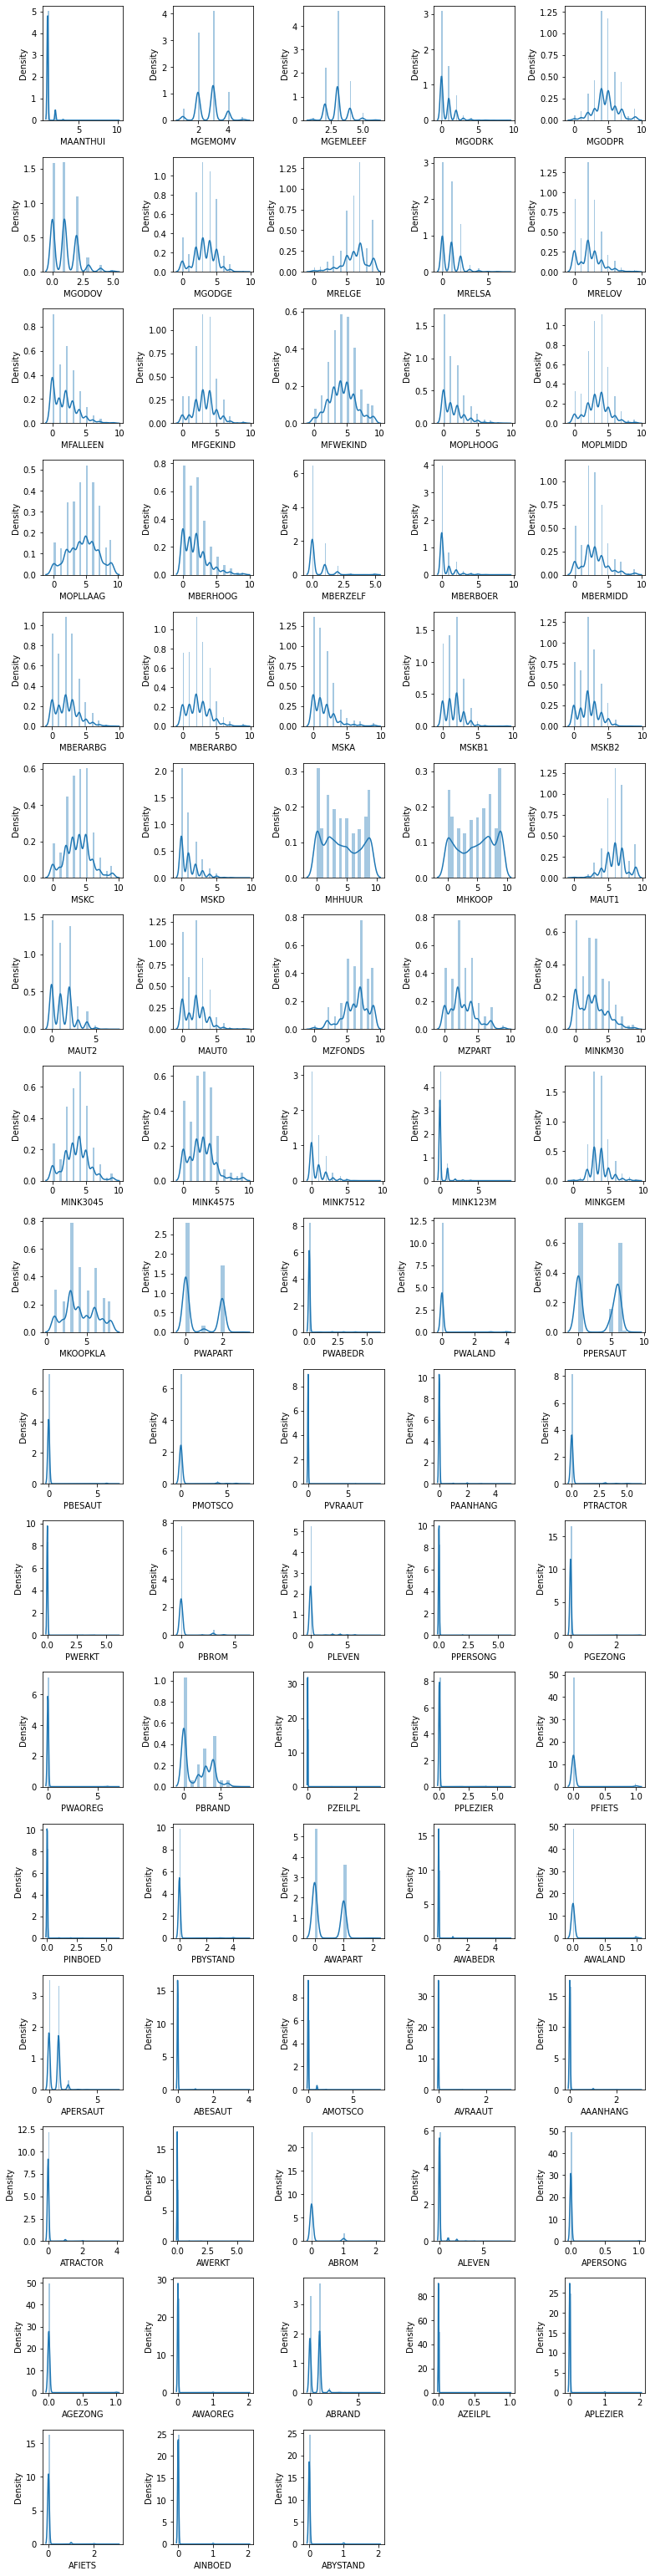

In [28]:
# Plotting numerical columns
plt.figure(figsize=(11,45))
sns.distributions._has_statsmodels=False
for i in range(len(num_columns)):
    plt.subplot(18,5,i+1)
    sns.distplot(df[num_columns[i]])
    
plt.tight_layout()

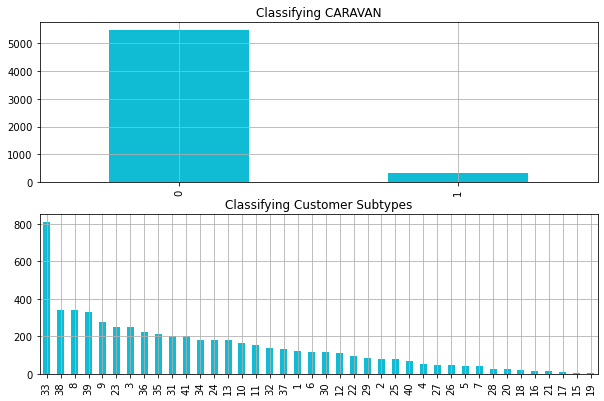

In [29]:
fig = plt.figure(figsize=(10,10));

# Plot Telling the total count of different values in CARAVAN
plt.subplot(3,1,1);
df['CARAVAN'].value_counts().plot(kind='bar', title='Classifying CARAVAN', color='#10bbd4', grid=True);

# Plot Telling the total count of different values in customer subtype
plt.subplot(3,1,2);
df['MOSTYPE'].value_counts().plot(kind='bar', align='center', title='Classifying Customer Subtypes', color='#10bbd4', grid=True);

33 = Lower class large families

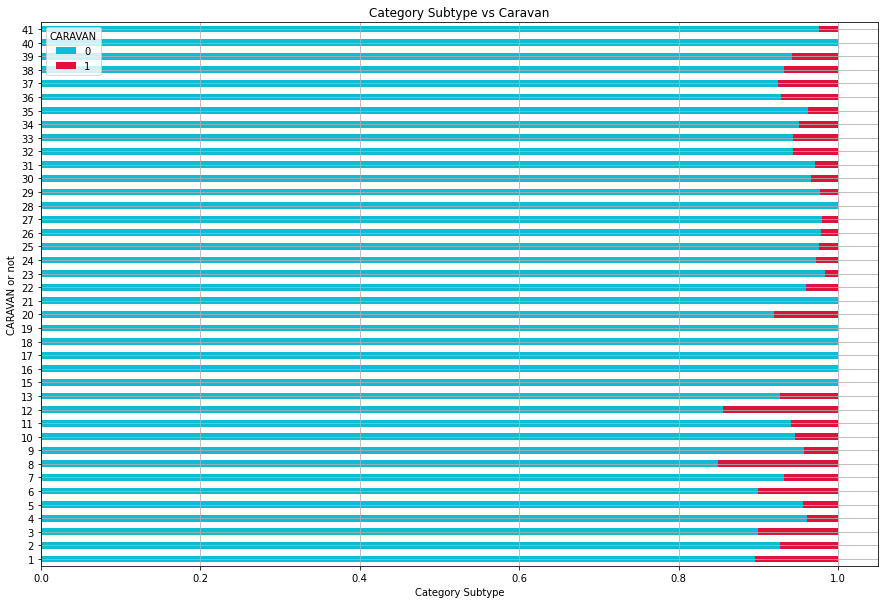

In [30]:
# Plotting the dependency of preferring caravan policy based on category subtype
categorysubtype_caravan = pd.crosstab(df['MOSTYPE'], df['CARAVAN']);
categorysubtype_caravan_percentage = categorysubtype_caravan.div(categorysubtype_caravan.sum(1).astype(float), axis=0);
categorysubtype_caravan_percentage.plot(figsize= (15,10), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Category Subtype vs Caravan', grid=True);
plt.xlabel('Category Subtype');
plt.ylabel('CARAVAN or not');

* Senior cosmopolitans (L0:15)
* Students in apartments (L0:16)
* Fresh masters in the city (L0:17)
* Single youth (L0:18)
* Suburban youth (L0:19)
* Large family farms (L0:40)

don't have any Caravan Policy, and

* Middle class families (L0:8)
* Affluent young families (L0:12)

have most of the Caravan Policies

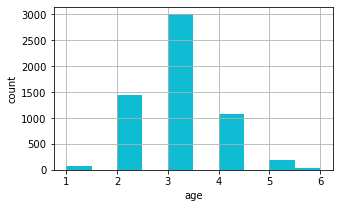

In [31]:
# dependency of preferring caravan based on age
df['MGEMLEEF'].hist(figsize=(5,3), fc='#10bbd4', grid=True);
plt.xlabel('age');
plt.ylabel('count');

* 0-50 Yrs Age group bought most policies (L1:3)

And

* 20-30 (L1:1)
* 70-80 (L1:6)

Age groups don't prefer buying any Policies

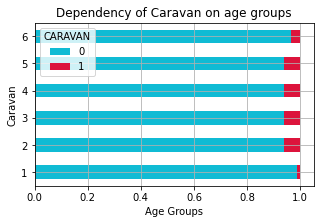

In [32]:
# dependeny of caravan on age groups
age_caravan = pd.crosstab(df['MGEMLEEF'], df['CARAVAN']);
age_caravan_percentage = age_caravan.div(age_caravan.sum(1).astype(float),axis=0);
age_caravan_percentage.plot(figsize=(5,3), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Dependency of Caravan on age groups', grid=True);
plt.xlabel('Age Groups');
plt.ylabel('Caravan');

Group 1 doesn't like Caravan (L1:1 = 20-30 years old).

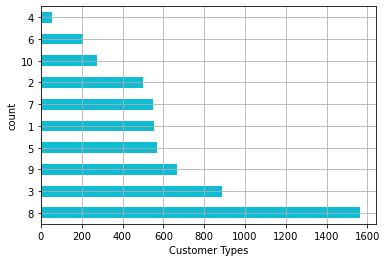

In [33]:
# dependemcy based on customer type
df['MOSHOOFD'].value_counts().plot(kind='barh', color='#10bbd4', grid=True);
plt.xlabel('Customer Types');
plt.ylabel('count');

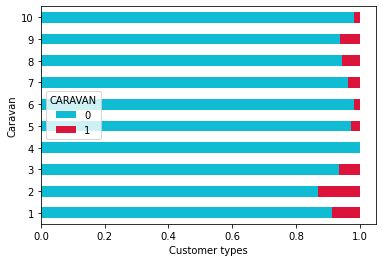

In [34]:
# dependency on customer types
cust_type_caravan = pd.crosstab(df['MOSHOOFD'], df['CARAVAN']);
cust_type_caravan_percentage = cust_type_caravan.div(cust_type_caravan.sum(1).astype(float), axis=0);
cust_type_caravan_percentage.plot(kind='barh', stacked=True, color = ['#10bbd4', 'Crimson']);
plt.xlabel('Customer types');
plt.ylabel('Caravan');

* "Conservative families" (L2:8)
* "Family with grown ups" (L2:8)
* "Driven Growers" (L2:2) 
* "Succesfull hedonists" (L2:1)
* "Average Family" (L2:3)

are important.

# Feature engineering

## Remove unnecessary columns and duplum rows

In [35]:
rem = []

for col in df.columns:
    if df[col].std() == 0: #standard deviation is zero
        rem.append(col)

#drop the columns        
df.drop(rem,axis=1,inplace=True)

print(rem)

[]


In [36]:
#df[col].std().min()

There isn't any constant column. And this std isn't so large to remove any other columns.

## Removing Duplums

In [37]:
df.duplicated().sum(), len(df)

(602, 5822)

This means we have a lof of duplicated rows.

In [38]:
df = df.drop_duplicates()

In [39]:
len(df)

5220

In [40]:
df_test.duplicated().sum(), len(df_test)

(307, 4000)

In [41]:
#df_test = df_test.drop_duplicates()

In [42]:
len(df_test)

4000

In [43]:
# Drop target
y = df["CARAVAN"]
df = df.drop("CARAVAN",axis=1)

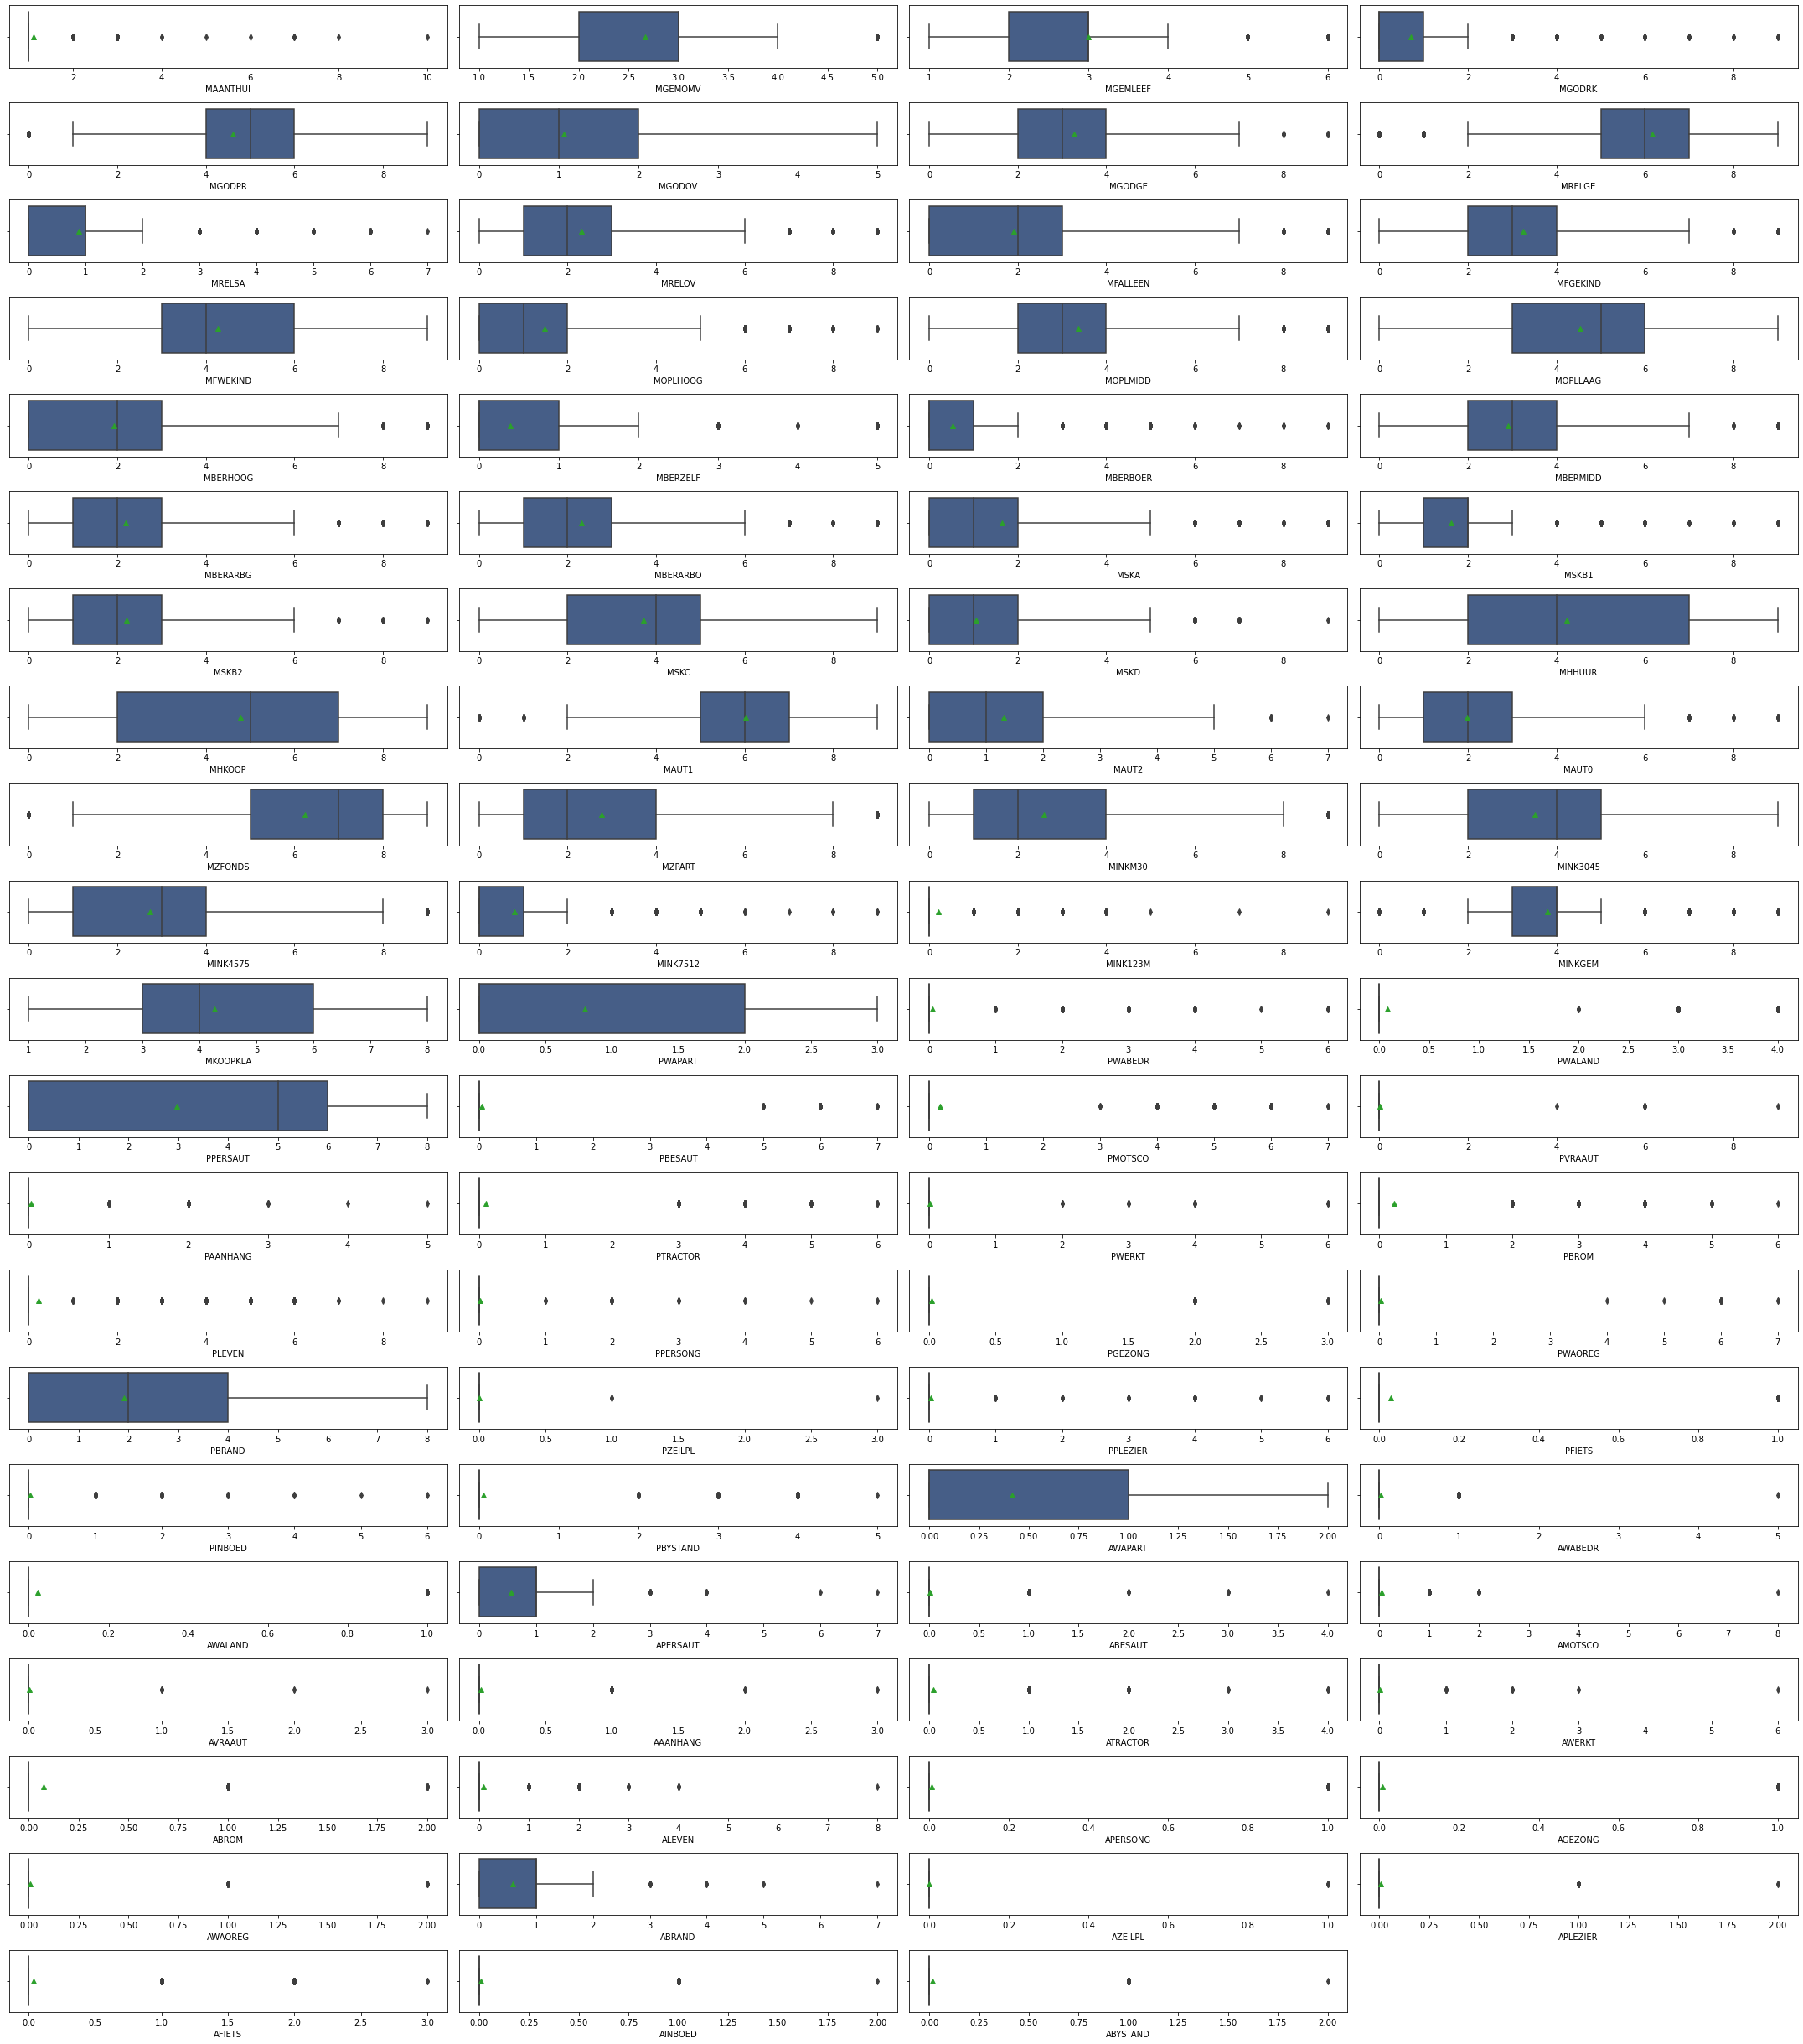

In [44]:
plt.figure(figsize=(30,40));

for i in range(len(num_columns)):
    plt.subplot(25,4,i+1);
    sns.boxplot(df[num_columns[i]],  showmeans=True, palette=[sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["medium green"]]);
    
plt.tight_layout();

## Scaling and One hot encoding

There are a lof of outliers in the numerical columns, so that we'll use RobustScaler to scaling them.
For categorical columns we will use pd.get_dummies()

In [45]:
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [46]:
len(df), len(df_test)

(5220, 4000)

In [47]:
robust_scaler = RobustScaler()
df[num_columns] = robust_scaler.fit_transform(df[num_columns])

In [48]:
df[num_columns]

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.5,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.0,-1.0,1.0,-0.5,0.0,0.5,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.0,-1.0,0.0,-0.5,0.5,0.5,-1.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,-1.0,0.5,0.5,-0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,-1.0,1.0,-0.5,0.0,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,0.0,-1.0,0.0,0.0,0.5,-0.5,0.0,0.0,-1.0,0.5,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
5817,0.0,-2.0,-1.0,0.0,0.5,0.0,-0.5,-2.5,1.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5818,0.0,1.0,1.0,1.0,-0.5,0.0,0.5,0.0,-1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5819,0.0,0.0,1.0,0.0,0.5,-0.5,0.0,-0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_test[num_columns] = robust_scaler.transform(df_test[num_columns])

In [50]:
df_test.head(2)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,0.0,1.0,-1.0,8,0.0,0.5,-0.5,0.0,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,0.0,0.0,-1.0,2,0.0,0.0,-0.5,0.5,-0.5,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df_all = pd.concat([df,df_test],axis=0)

In [52]:
df_all[cat_columns] = df_all[cat_columns].astype(str)

In [53]:
df_all = pd.get_dummies(df_all)

In [54]:
df_all

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,MOSHOOFD_1,MOSHOOFD_10,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9
0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.5,-1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,-1.0,-1.0,1.0,-0.5,0.0,0.5,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,-1.0,-1.0,0.0,-0.5,0.5,0.5,-1.5,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,2.0,-1.0,0.5,0.5,-0.5,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,1.0,-1.0,1.0,-0.5,0.0,0.5,0.5,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,-1.0,1.0,0.0,1.0,0.5,-1.5,-0.5,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3996,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3997,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.5,-1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3998,0.0,0.0,0.0,1.0,-0.5,0.5,0.0,0.5,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
len(df_all), len(df), len(df_test)

(9220, 5220, 4000)

In [56]:
len_df = len(df)

In [57]:
df = df_all.iloc[:len_df]
df_test = df_all.iloc[len_df:]

In [58]:
len(df_all), len(df), len(df_test)

(9220, 5220, 4000)

## Oversampling and undersampling the training set

In [59]:
y.value_counts()

0    4880
1     340
Name: CARAVAN, dtype: int64

In [60]:
from scipy.stats import describe
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import Pipeline as imb_Pipeline
from imblearn.base import SamplerMixin
from sklearn.decomposition import PCA


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import time

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.25, random_state=42)

In [63]:
y_train.sum()/(len(y_train)-y_train.sum())

0.06821282401091405

In [64]:
# tuning sampling strategies by hand
start = time.time()
max_over = 0.0
max_under = 0.0
max_balanced_accuracy = 0.0

DIV_NUM = 100
DIV_SIZE = 1.0/DIV_NUM

for over_rate_ind in np.arange(11,1+DIV_NUM//5,1):
    over_rate = over_rate_ind*DIV_SIZE
    over = RandomOverSampler(sampling_strategy=over_rate)
    X_train_over, y_train_over = over.fit_resample(X_train,y_train)
    for under_rate_ind in np.arange(81,1+DIV_NUM,1):
        under_rate = under_rate_ind*DIV_SIZE
        under = RandomUnderSampler(sampling_strategy=under_rate)
        X_train_under, y_train_under = under.fit_resample(X_train_over,y_train_over)
        
        rforest = RandomForestClassifier(n_estimators=100)
        rforest.fit(X_train_under,y_train_under)
        y_pred = rforest.predict(X_test)
        print(f"over: {over_rate:.2f} & under: {under_rate:.2f} | score: {balanced_accuracy_score(y_test,y_pred):.4f}")
        balanced_accuracy_score_temp = balanced_accuracy_score(y_test,y_pred)
        if balanced_accuracy_score_temp > max_balanced_accuracy:
            max_balanced_accuracy = balanced_accuracy_score_temp
            max_over = over_rate
            max_under = under_rate
end = time.time()
print(f"{end-start:.2f}s")

over: 0.11 & under: 0.81 | score: 0.5852
over: 0.11 & under: 0.82 | score: 0.5700
over: 0.11 & under: 0.83 | score: 0.6088
over: 0.11 & under: 0.84 | score: 0.6002
over: 0.11 & under: 0.85 | score: 0.6235
over: 0.11 & under: 0.86 | score: 0.5852
over: 0.11 & under: 0.87 | score: 0.6354
over: 0.11 & under: 0.88 | score: 0.6173
over: 0.11 & under: 0.89 | score: 0.5944
over: 0.11 & under: 0.90 | score: 0.6628
over: 0.11 & under: 0.91 | score: 0.6272
over: 0.11 & under: 0.92 | score: 0.5942
over: 0.11 & under: 0.93 | score: 0.5835
over: 0.11 & under: 0.94 | score: 0.5969
over: 0.11 & under: 0.95 | score: 0.6623
over: 0.11 & under: 0.96 | score: 0.6012
over: 0.11 & under: 0.97 | score: 0.6169
over: 0.11 & under: 0.98 | score: 0.6115
over: 0.11 & under: 0.99 | score: 0.6163
over: 0.11 & under: 1.00 | score: 0.6181
over: 0.12 & under: 0.81 | score: 0.5825
over: 0.12 & under: 0.82 | score: 0.6309
over: 0.12 & under: 0.83 | score: 0.5977
over: 0.12 & under: 0.84 | score: 0.6111
over: 0.12 & und

In [65]:
max_over, max_under, max_balanced_accuracy

(0.11, 0.9, 0.6627572016460905)

# Models

## 1st Competition

Ensemble of Random forests.

In [66]:
def train_ensemble(X_train,y_train,over_rate,under_rate, num_models=10,num_estimators = 100,max_depth=10,max_features=10):
    """
    Training an ensemble random forest model
    """
    models=[]
    for i in range(num_models):
        over = RandomOverSampler(sampling_strategy=over_rate)
        X_train_over, y_train_over = over.fit_resample(X_train,y_train)
        under = RandomUnderSampler(sampling_strategy=under_rate)
        X_train_under, y_train_under = under.fit_resample(X_train_over,y_train_over)
        rforest = RandomForestClassifier(n_estimators=num_estimators,max_depth=max_depth,max_features=max_features)
        rforest.fit(X_train_under,y_train_under)
        models.append(rforest)
    return models

In [67]:
def predict_ensemble(X,models):
    """
    Creating ensemble prediction
    """
    y_preds = []
    for model in models:
        y_pred = model.predict(X)
        y_preds.append(y_pred)
    y_preds = np.array(y_preds)
    return np.round(np.mean(np.array(y_preds),axis=0)).astype(int)

In [68]:
models = train_ensemble(X_train,y_train,max_over,max_under,10,100,5,50)

In [69]:
y_preds = predict_ensemble(X_test,models)

In [70]:
y_preds

array([0, 1, 0, ..., 0, 0, 1])

In [71]:
balanced_accuracy_score(y_test,y_preds)

0.6969135802469135

In [72]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
def print_report(y_true,y_pred):
    cm = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_true), 
                      columns=["0","1"], index=["0","1"])
    cm.index.name = 'True'
    cm.columns.name = 'Predicted'
    return cm

In [73]:
print_report(y_test,y_preds)

Predicted,0,1
True,,
0,897,318
1,31,59


### Searching the hyperparameters by hand

1. number of models
2. num_estimators
3. max_depth
4. max_features

In [74]:
# 1. number of models
max_ba_score = 0.0
max_model_num = 0
max_estimators = 0
max_depth = 0
max_features = 0
start = time.time()
TRY = 100
best_models = None

# Random CV
for i in range(0,TRY):
    model_num = np.random.randint(1,21)
    n_estimators = np.random.randint(1,201)
    depth = np.random.randint(1,21)
    features = np.random.randint(1,101)
    
    models = train_ensemble(X_train,y_train,max_over,max_under,
                            num_models=model_num,
                            num_estimators = n_estimators,
                            max_depth=depth,
                            max_features=features
                           )
    y_preds = predict_ensemble(X_test,models)
    ba_score_temp = balanced_accuracy_score(y_test,y_preds)
    if ba_score_temp > max_ba_score:
        max_ba_score = ba_score_temp
        max_model_num = model_num
        max_estimators = n_estimators
        max_depth = depth
        max_features = features
        best_models = models

    end = time.time()
    print(f"{i+1}/{TRY} | score: {ba_score_temp:.4f} | time: {end-start:.2f}s")
max_ba_score, max_model_num, max_estimators, max_depth, max_features

1/100 | score: 0.6340 | time: 2.36s
2/100 | score: 0.6533 | time: 11.23s
3/100 | score: 0.6537 | time: 23.77s
4/100 | score: 0.6901 | time: 30.37s
5/100 | score: 0.6556 | time: 41.35s
6/100 | score: 0.6879 | time: 44.23s
7/100 | score: 0.6370 | time: 48.33s
8/100 | score: 0.6770 | time: 52.51s
9/100 | score: 0.7010 | time: 55.66s
10/100 | score: 0.7008 | time: 60.44s
11/100 | score: 0.6749 | time: 64.24s
12/100 | score: 0.6776 | time: 69.23s
13/100 | score: 0.7078 | time: 75.45s
14/100 | score: 0.7035 | time: 78.74s
15/100 | score: 0.6412 | time: 79.26s
16/100 | score: 0.6724 | time: 84.38s
17/100 | score: 0.6936 | time: 85.35s
18/100 | score: 0.6774 | time: 96.19s
19/100 | score: 0.6763 | time: 101.99s
20/100 | score: 0.6601 | time: 108.85s
21/100 | score: 0.6722 | time: 110.16s
22/100 | score: 0.6992 | time: 112.33s
23/100 | score: 0.7043 | time: 113.71s
24/100 | score: 0.6549 | time: 122.05s
25/100 | score: 0.6488 | time: 125.36s
26/100 | score: 0.6944 | time: 135.20s
27/100 | score

(0.7078189300411523, 11, 155, 3, 96)

In [75]:
y_preds = predict_ensemble(X_train,best_models)
print(balanced_accuracy_score(y_train,y_preds))
y_preds = predict_ensemble(X_test,best_models)
balanced_accuracy_score(y_test,y_preds)

0.709162346521146


0.7078189300411523

In [76]:
max_ba_score, max_model_num, max_estimators, max_depth, max_features

(0.7078189300411523, 11, 155, 3, 96)

**Conclusion** The best model has ~0.7 balanced accuracy on the validation set.
I won't refit this model on the whole training (training+validation) dataset.
I'll compare now these results with `RandomSearchCV`.

In [77]:
over = RandomOverSampler(sampling_strategy=max_over)
X_train_over, y_train_over = over.fit_resample(X_train,y_train)
under = RandomUnderSampler(sampling_strategy=max_under)
X_train_under, y_train_under = under.fit_resample(X_train_over,y_train_over)

In [78]:
# random search cv
start = time.time()
rf = RandomForestClassifier()
params = { 'max_depth': np.arange(1,21),
           'n_estimators': np.arange(10,200,10),
           'max_depth': np.arange(1,21),
           'max_features': np.arange(1,101,10)
            }

model_2 = RandomizedSearchCV(rf, 
                        params, 
                        cv = 5, 
                        n_iter = 500, # instead of 1
                        refit=True,
                        n_jobs=4,
                        scoring='balanced_accuracy',
                        verbose=0)
model_2.fit(X_train_under,y_train_under)

print("Best params:{}".format(model_2.best_params_))
end = time.time()
print(f"Time: {end-start:.2f}s")

y_pred_2 = model_2.predict(X_test)
balanced_accuracy_score(y_test,y_pred_2)

Best params:{'n_estimators': 50, 'max_features': 41, 'max_depth': 18}
Time: 246.94s


0.6405349794238684

In [79]:
max_ba_score, max_model_num, max_estimators, max_depth, max_features

(0.7078189300411523, 11, 155, 3, 96)

### Comparison the models

In [80]:
# 1st model
y_train_pred = predict_ensemble(X_train,best_models)
print(balanced_accuracy_score(y_train,y_train_pred))
y_test_pred = predict_ensemble(X_test,best_models)
print(balanced_accuracy_score(y_test,y_test_pred))

0.709162346521146
0.7078189300411523


In [81]:
print_report(y_test,y_test_pred)

Predicted,0,1
True,,
0,856,359
1,26,64


In [82]:
# 2nd model
y_train_pred = model_2.predict(X_train)
print(balanced_accuracy_score(y_train,y_train_pred))
y_test_pred = model_2.predict(X_test)
balanced_accuracy_score(y_test,y_test_pred)

0.9100954979536153


0.6405349794238684

In [83]:
print_report(y_test,y_test_pred)

Predicted,0,1
True,,
0,949,266
1,45,45


**Conclusion** Hmm, I choose the first model, because it generalizes better.

### Creating the submission

In [84]:
X_test_final = df_test.to_numpy()

In [85]:
X_test_final.shape

(4000, 133)

In [86]:
y_test_final_pred = predict_ensemble(X_test_final,best_models)

In [87]:
y_test_final_pred

array([0, 1, 1, ..., 1, 1, 0])

In [88]:
df_test.head()

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,MOSHOOFD_1,MOSHOOFD_10,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9
0,0.0,1.0,-1.0,0.0,0.5,-0.5,0.0,-0.5,-1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,-1.0,0.0,0.0,-0.5,0.5,-0.5,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,1.0,-0.5,0.5,0.0,-0.5,1.0,0.5,...,0,0,0,0,0,0,0,0,0,1
3,0.0,-1.0,0.0,2.0,-1.0,0.5,0.5,-0.5,3.0,-0.5,...,0,0,0,1,0,0,0,0,0,0
4,0.0,-1.0,1.0,0.0,-1.5,-0.5,2.0,1.5,-1.0,-1.0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
name = "dm_competition2_Bela_J_Szekeres_submission1.txt"

In [90]:
pd.DataFrame(y_test_final_pred).to_csv(name,header=None,index=False)

## 2nd Competition

Any model:

We'll construct here an XGB Classifier model by randomsearchcv.

In [91]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [92]:
# random search cv
start = time.time()
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
params = {
        'min_child_weight': [5, 6,7],
        'gamma': [0.8,1,1.2],
        'subsample': [0.9,1.0],
        'colsample_bytree': [0.6,0.7,0.8],
        'max_depth': [2]
        }

model_3 = RandomizedSearchCV(xgb_model, 
                        params, 
                        cv = 5, 
                        n_iter = 10, # instead of 1
                        refit=True,
                        n_jobs=1,
                        scoring='balanced_accuracy',
                        verbose=0)
model_3.fit(X_train_under,y_train_under,eval_metric="logloss")

print(f"Best params:{model_3.best_params_}")
end = time.time()
print(f"Time: {end-start:.2f}s")

y_pred_3 = model_3.predict(X_test)
balanced_accuracy_score(y_test,y_pred_3)

Best params:{'subsample': 0.9, 'min_child_weight': 7, 'max_depth': 2, 'gamma': 0.8, 'colsample_bytree': 0.7}
Time: 16.44s


0.6526748971193415

In [93]:
y_train_pred_3 = model_3.predict(X_train)
balanced_accuracy_score(y_train,y_train_pred_3)

0.7904420190995907

In [94]:
def train_ensemble_xgb(X_train,y_train,over_rate,under_rate,num_models=10,learning_rate=0.01,n_estimators = 100,max_depth=10,subsample=0.8,colsample_bytree=1.0,gamma=1.0,min_child_weight = 5):
    """
    Training an ensemble XGB model
    """
    models=[]
    for i in range(num_models):
        over = RandomOverSampler(sampling_strategy=over_rate)
        X_train_over, y_train_over = over.fit_resample(X_train,y_train)
        under = RandomUnderSampler(sampling_strategy=under_rate)
        X_train_under, y_train_under = under.fit_resample(X_train_over,y_train_over)
        xgb_cl = xgb.XGBClassifier(colsample_bytree=colsample_bytree,
                                   gamma=gamma,
                                   learning_rate=learning_rate,
                                   max_depth=max_depth,
                                   n_estimators=n_estimators,
                                   subsample=subsample,
                                   min_child_weight=min_child_weight
              )
        xgb_cl.fit(X_train_under,y_train_under,eval_metric="logloss")
        models.append(xgb_cl)
    return models

In [95]:
xgb_models = train_ensemble_xgb(X_train,y_train,max_over,max_under,learning_rate=0.5)

In [96]:
y_pred = predict_ensemble(X_test,xgb_models)

In [97]:
balanced_accuracy_score(y_pred,y_test)

0.5446034269563681

In [99]:
# Random Search
best_ba_score = 0.0

# Hyperparameters

#'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5]

# num_models=10,learning_rate=0.01,n_estimators = 100,max_depth=3,subsample=0.8,colsample_bytree=1.0,gamma=1.0)

num_models_best = 0
learning_rate_best = 0.0
n_estimators_best = 0
max_depth_best = 0
subsample_best = 0.0
colsample_bytree_best = 0.0
gamma_best = 0.0
min_child_weight = 0

start = time.time()
TRY = 25
best_models = None

# Random CV

# Help for the parameter settings:
# https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

for i in range(0,TRY):
    
    # Generating randomly the candidates
    
    num_models = np.random.randint(1,21)
    learning_rate = np.random.rand()*0.2
    n_estimators = np.random.randint(51,201)
    max_depth = np.random.randint(2,4)
    subsample = np.random.rand()*0.5+0.5
    colsample_bytree = np.random.rand()*0.5+0.5
    min_child_weight = np.random.randint(3,8)
    gamma = np.random.rand()*5
    
    models_xgb = train_ensemble_xgb(X_train,y_train,max_over,max_under,
                       num_models=num_models,
                       learning_rate=learning_rate,
                       n_estimators = n_estimators,
                       max_depth = max_depth,
                       subsample = subsample,
                       colsample_bytree = colsample_bytree,
                       min_child_weight = min_child_weight,
                       gamma = gamma)
    
    # stacking the outputs by logistic regression
    y_preds_test = predict_ensemble(X_test,models_xgb)  
    
    ba_score_temp = balanced_accuracy_score(y_preds_test,y_test)
    if ba_score_temp > best_ba_score:
        best_ba_score = ba_score_temp
        
        num_models_best = num_models
        learning_rate_best = learning_rate
        n_estimators_best = n_estimators
        max_depth_best = max_depth
        subsample_best = subsample
        colsample_bytree_best = colsample_bytree
        gamma_best = gamma
        min_child_weight_best = min_child_weight
        
        best_models = models_xgb

    end = time.time()
    print(f"{i+1}/{TRY} | score: {ba_score_temp:.4f} | time: {end-start:.2f}s")
    

print("\nUnfortunately, this strategy didn't worked well here.")
best_ba_score

1/25 | score: 0.5560 | time: 2.46s
2/25 | score: 0.5550 | time: 6.55s
3/25 | score: 0.5366 | time: 6.85s
4/25 | score: 0.5581 | time: 10.08s
5/25 | score: 0.5527 | time: 16.90s
6/25 | score: 0.5630 | time: 19.68s
7/25 | score: 0.5564 | time: 22.48s
8/25 | score: 0.5460 | time: 25.26s
9/25 | score: 0.5589 | time: 29.21s
10/25 | score: 0.5603 | time: 32.56s
11/25 | score: 0.5597 | time: 34.48s
12/25 | score: 0.5556 | time: 35.26s
13/25 | score: 0.5574 | time: 40.86s
14/25 | score: 0.5540 | time: 43.45s
15/25 | score: 0.5457 | time: 48.33s
16/25 | score: 0.5473 | time: 48.64s
17/25 | score: 0.5554 | time: 54.88s
18/25 | score: 0.5508 | time: 59.56s
19/25 | score: 0.5579 | time: 64.97s
20/25 | score: 0.5555 | time: 74.63s
21/25 | score: 0.5569 | time: 78.98s
22/25 | score: 0.5553 | time: 82.82s
23/25 | score: 0.5508 | time: 93.90s
24/25 | score: 0.5617 | time: 97.45s
25/25 | score: 0.5632 | time: 104.70s

Unfortunately, this strategy didn't worked well here.


0.5631838495916166

**Conclusion** After a lot of numerical experiments I decided to submit my first competition entry for the 2nd competition as well.

In [100]:
name = "dm_competition2_Bela_J_Szekeres_submission2.txt"

In [101]:
pd.DataFrame(y_test_final_pred).to_csv(name,header=None,index=False)